In [20]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris().data.copy()

In [4]:
m = iris.mean(axis=0)
ir = iris - m
cv = np.cov(ir, rowvar=False)
val, vec = np.linalg.eig(cv)
val = np.abs(val)
idx = np.argsort(val)[::-1]
ex = val[idx] / val.sum()
print("The fractions: ", ex)

The fractions:  [0.92461872 0.05306648 0.01710261 0.00521218]


In [9]:
w = np.vstack((vec[:, idx[0]], vec[:, idx[1]]))
w

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102]])

In [25]:
d = np.zeros((ir.shape[0], 2))
for i in range(ir.shape[0]):
    d[i, :] = np.dot(w, ir[i])
d

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,

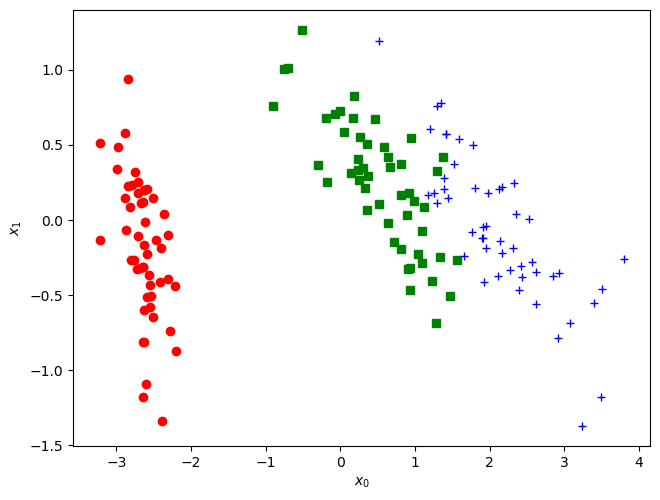

In [36]:
labels = load_iris().target.copy()
markers = np.array(["o","s","+"])[labels]
colours = np.array(["r","g","b"])[labels]
for i in range(len(labels)):
    plt.plot(d[i,0], d[i,1], marker=markers[i], color=colours[i], linestyle='none')
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(ir)
dd = pca.fit_transform(ir)

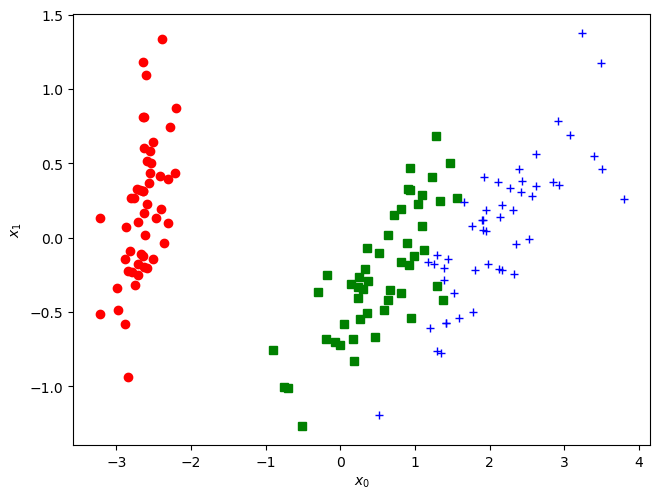

In [37]:
for i in range(len(labels)):
    plt.plot(dd[i,0], dd[i,1], marker=markers[i], color=colours[i], linestyle='none')
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

In [39]:
u, s, vt = np.linalg.svd(ir)
u, s, vt

(array([[-1.06937444e-01, -5.31164840e-02,  8.17734010e-03, ...,
          5.43380310e-02,  1.96438400e-03,  2.46978090e-03],
        [-1.08133305e-01,  2.94357038e-02,  6.16531816e-02, ...,
          5.12936114e-03,  8.48544595e-02,  5.83496936e-03],
        [-1.15099407e-01,  2.41054172e-02, -5.24368218e-03, ...,
          2.75184277e-02,  1.78604309e-01,  1.49419118e-01],
        ...,
        [ 7.02927688e-02, -1.31144057e-02, -3.82231512e-02, ...,
          9.89532683e-01, -1.25488246e-02, -7.17729676e-04],
        [ 7.57348450e-02, -1.93954931e-02, -2.11868549e-01, ...,
         -1.41206665e-02,  9.52049996e-01, -2.32048811e-02],
        [ 5.53860977e-02,  4.70071528e-02, -1.06310369e-01, ...,
         -8.30595907e-04, -2.19201906e-02,  9.77300244e-01]]),
 array([25.09996044,  6.01314738,  3.41368064,  1.88452351]),
 array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
        [ 0.58202985, -0.59791083, -0.07623

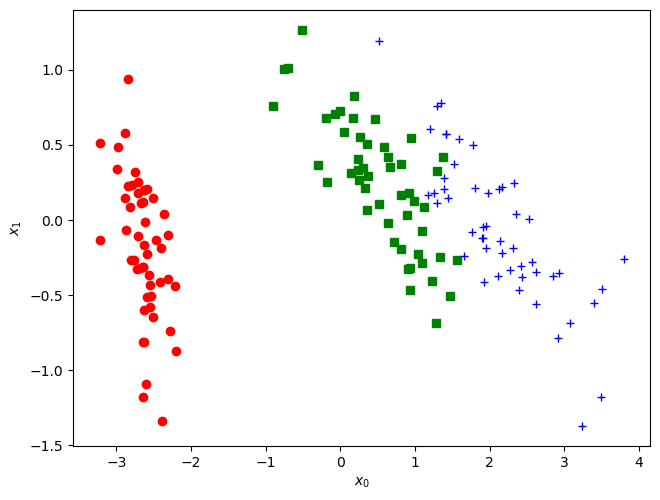

In [42]:
S = np.zeros((ir.shape[0], ir.shape[1]))
for i in range(4):
    S[i, i] = s[i]
S = S[:, :2]
T = u @ S
for i in range(len(labels)):
    plt.plot(T[i,0], T[i,1], marker=markers[i], color=colours[i], linestyle='none')
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()